In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv('/content/drive/MyDrive/Foxford/Андрей/cleared_titanic.csv')
data.head()

,Survived,Pclass,Age,Fare,Sex,Embarked
0,0,3,22.0,7.2500,1,1
1,1,1,38.0,71.2833,0,2
2,1,3,26.0,7.9250,0,1
3,1,1,35.0,53.1000,0,1
4,0,3,35.0,8.0500,1,1


# Точечная диаграмма рассеяния

> Позволяет понять не только степень корреляции и ее направление, но и распределение объектов, а также характер их связи

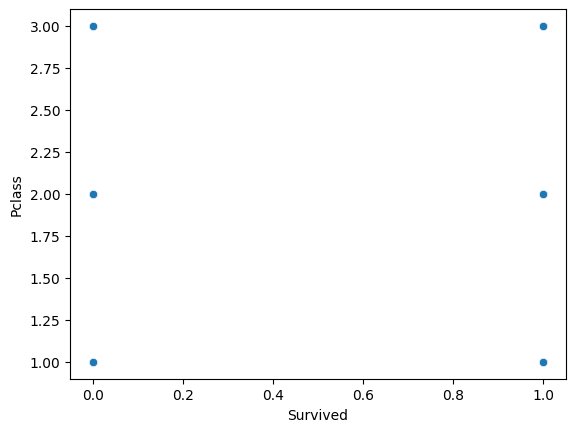

In [5]:
sns.scatterplot(data=data, x='Survived', y='Pclass');

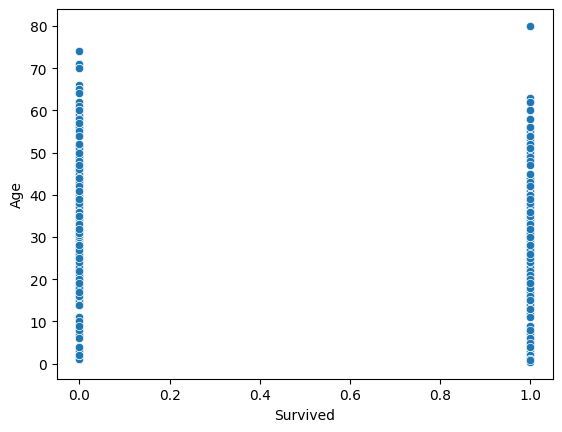

In [6]:
sns.scatterplot(data=data, x='Survived', y='Age');

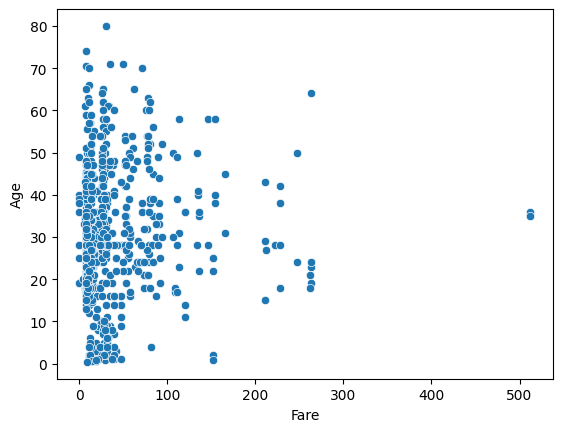

In [7]:
sns.scatterplot(data=data, x='Fare', y='Age');

In [10]:
data.corr(numeric_only=True)

,Survived,Pclass,Age,Fare,Sex,Embarked
Survived,1.000000,-0.338481,-0.064910,0.257307,-0.543351,0.106811
Pclass,-0.338481,1.000000,-0.339898,-0.549500,0.131900,0.045702
Age,-0.064910,-0.339898,1.000000,0.096688,0.081163,-0.009165
Fare,0.257307,-0.549500,0.096688,1.000000,-0.182333,0.062142
Sex,-0.543351,0.131900,0.081163,-0.182333,1.000000,-0.116569
Embarked,0.106811,0.045702,-0.009165,0.062142,-0.116569,1.000000


**Пример положительной корреляции с высоким показателем**

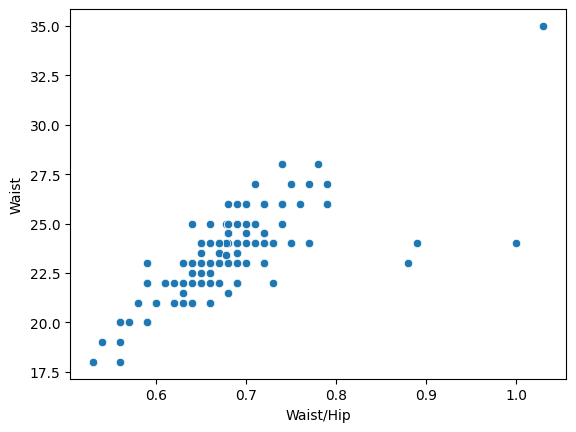

Определение типа корреляции

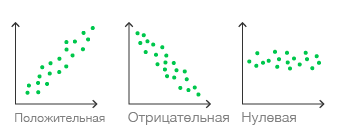

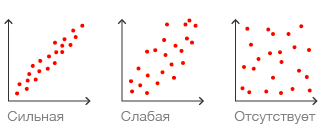

# График попарный отношений

Используется когда нам нужно определить характер и направленность связи между всеми и каждым признаками в данных

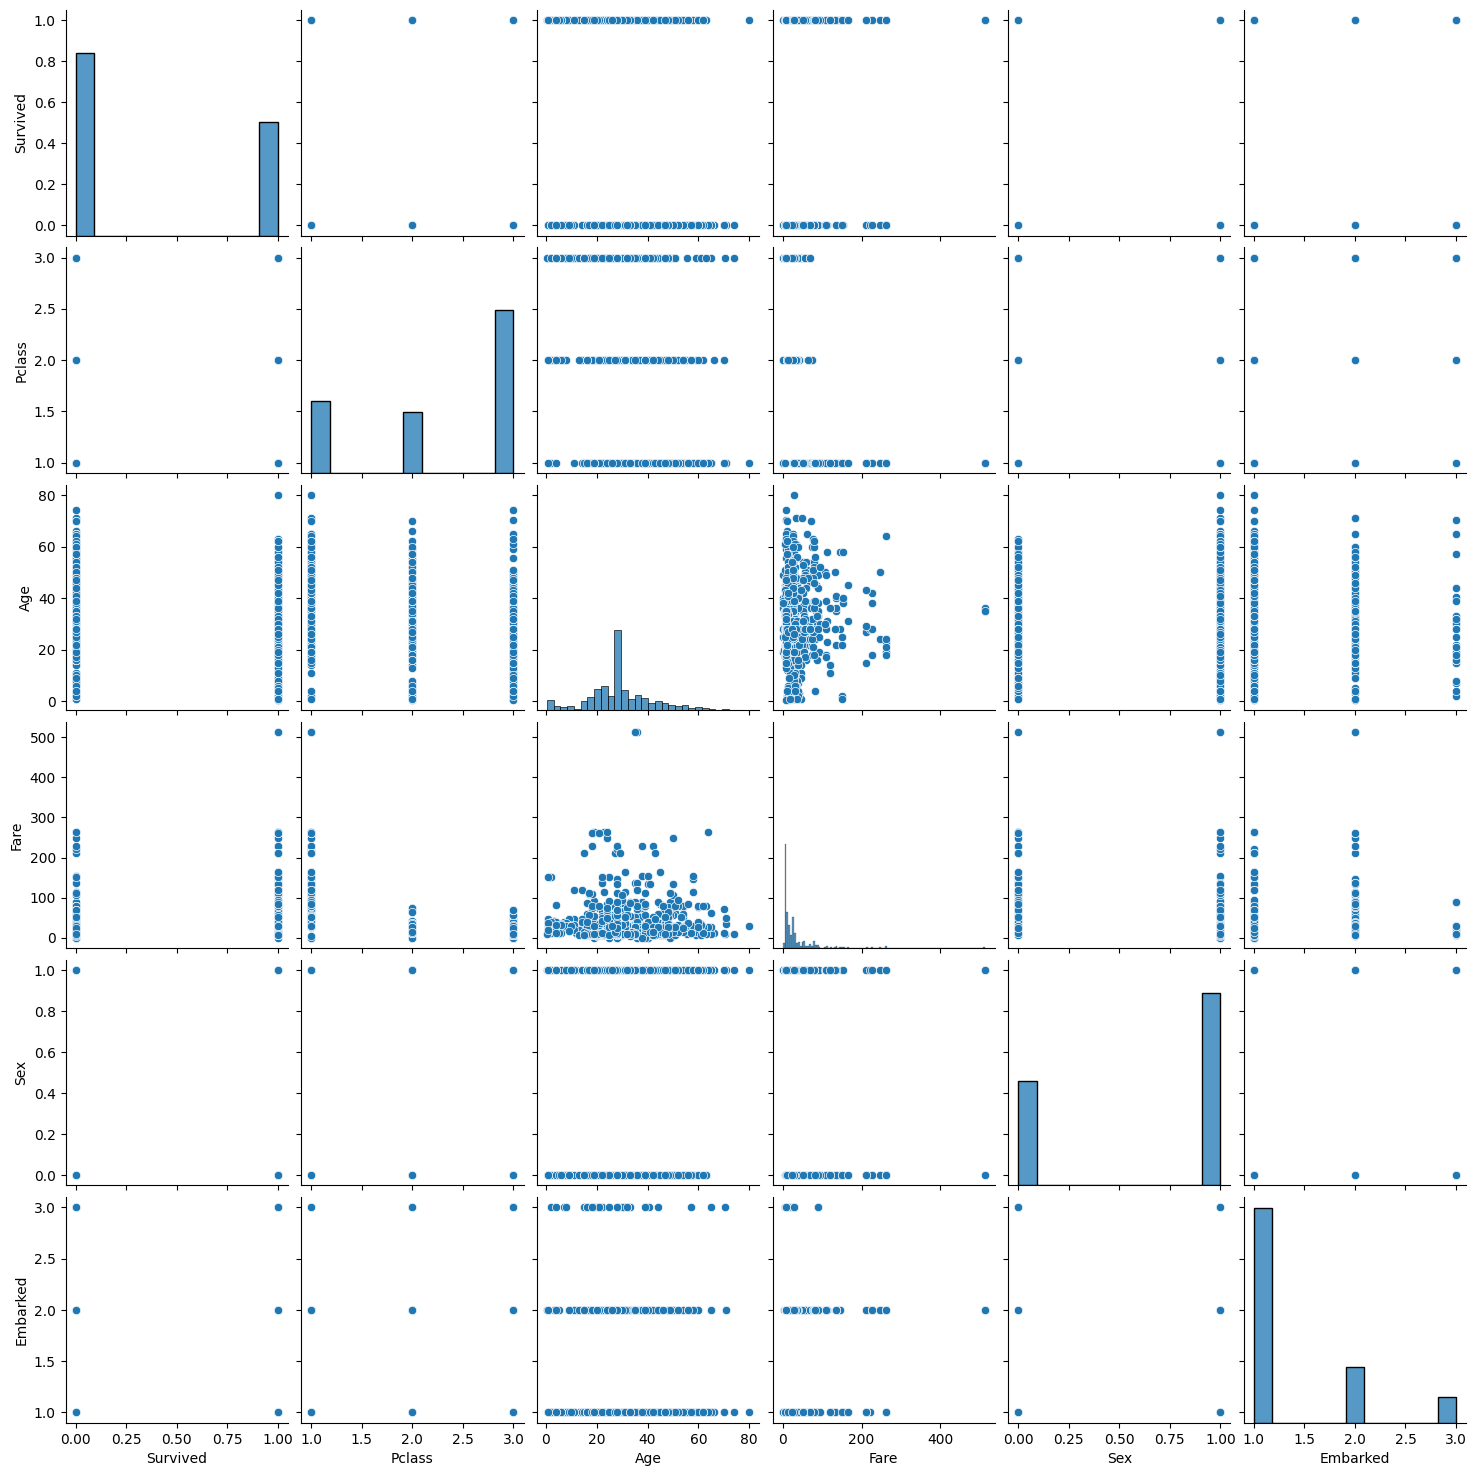

In [11]:
sns.pairplot(data)

Тепловая карта корреляций

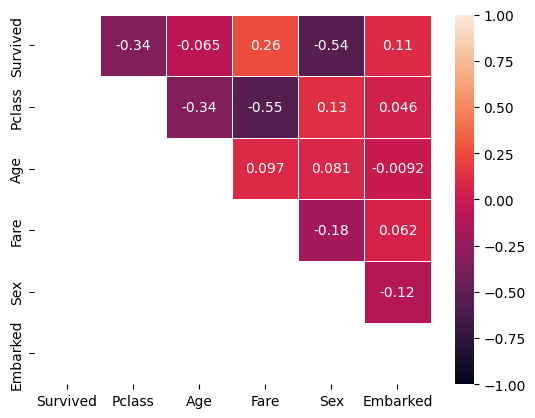

In [22]:
matrix = np.tril(data.corr()) # Создаем треугольную матрицу корреляций
sns.heatmap(data.corr(),
            annot=True, # добавляет метки на каждый объект корреляции
            fmt = '.2g', # указываем сколько объектов после запятой оставляем - без округления
            vmin=-1,    # Задача нижней границы корреляции
            vmax=1,      # Задача верхней границы корреляции
            linewidth=0.5,   # Добавление толщины строк и столбцов таблицы
            linecolor='white', # Задаем цвет границам таблицы
            mask=matrix);

In [23]:
data.head()

,Survived,Pclass,Age,Fare,Sex,Embarked
0,0,3,22.0,7.2500,1,1
1,1,1,38.0,71.2833,0,2
2,1,3,26.0,7.9250,0,1
3,1,1,35.0,53.1000,0,1
4,0,3,35.0,8.0500,1,1


In [26]:
# Преобразуем и сгенерируем признаки
data['Pclass_1'] = data['Pclass'].apply(lambda x: 1 if x == 1 else 0)
data['Pclass_2'] = data['Pclass'].apply(lambda x: 1 if x == 2 else 0)
data['Pclass_3'] = data['Pclass'].apply(lambda x: 1 if x == 3 else 0)
data.head()

,Survived,Pclass,Age,Fare,Sex,Embarked,Pclass_1,Pclass_2,Pclass_3
0,0,3,22.0,7.2500,1,1,0,0,1
1,1,1,38.0,71.2833,0,2,1,0,0
2,1,3,26.0,7.9250,0,1,0,0,1
3,1,1,35.0,53.1000,0,1,1,0,0
4,0,3,35.0,8.0500,1,1,0,0,1


In [27]:
data['Embarked'].value_counts()

Embarked
1    646
2    168
3     77
Name: count, dtype: int64

In [28]:
data['Embarked_1'] = data['Embarked'].apply(lambda x: 1 if x == 1 else 0)
data['Embarked_2'] = data['Embarked'].apply(lambda x: 1 if x == 2 else 0)
data['Embarked_3'] = data['Embarked'].apply(lambda x: 1 if x == 3 else 0)
data.head()

,Survived,Pclass,Age,Fare,Sex,Embarked,Pclass_1,Pclass_2,Pclass_3,Embarked_1,Embarked_2,Embarked_3
0,0,3,22.0,7.2500,1,1,0,0,1,1,0,0
1,1,1,38.0,71.2833,0,2,1,0,0,0,1,0
2,1,3,26.0,7.9250,0,1,0,0,1,1,0,0
3,1,1,35.0,53.1000,0,1,1,0,0,1,0,0
4,0,3,35.0,8.0500,1,1,0,0,1,1,0,0


In [36]:
data['Sex_Male'] = data['Sex'].apply(lambda x: 1 if x == 1 else 0)
data['Sex_Female'] = data['Sex'].apply(lambda x: 0 if x == 1 else 1)

data.head()

,Survived,Pclass,Age,Fare,Sex,Embarked,Pclass_1,Pclass_2,Pclass_3,Embarked_1,Embarked_2,Embarked_3,Age_Male,Age_Female,Sex_Male,Sex_Female
0,0,3,22.0,7.2500,1,1,0,0,1,1,0,0,0,1,1,0
1,1,1,38.0,71.2833,0,2,1,0,0,0,1,0,0,1,0,1
2,1,3,26.0,7.9250,0,1,0,0,1,1,0,0,0,1,0,1
3,1,1,35.0,53.1000,0,1,1,0,0,1,0,0,0,1,0,1
4,0,3,35.0,8.0500,1,1,0,0,1,1,0,0,0,1,1,0


In [37]:
data = data.drop(['Pclass', 'Sex', 'Embarked'], axis=1)
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_1,Embarked_2,Embarked_3,Age_Male,Age_Female,Sex_Male,Sex_Female
0,0,22.0,7.2500,0,0,1,1,0,0,0,1,1,0
1,1,38.0,71.2833,1,0,0,0,1,0,0,1,0,1
2,1,26.0,7.9250,0,0,1,1,0,0,0,1,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,0,1,0,1
4,0,35.0,8.0500,0,0,1,1,0,0,0,1,1,0


In [40]:
data['Fare'] = data['Fare'].apply(lambda x: round(x, 2))
data['Age'] = data['Age'].apply(lambda x: round(x))

data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_1,Embarked_2,Embarked_3,Age_Male,Age_Female,Sex_Male,Sex_Female
0,0,22,7.25,0,0,1,1,0,0,0,1,1,0
1,1,38,71.28,1,0,0,0,1,0,0,1,0,1
2,1,26,7.92,0,0,1,1,0,0,0,1,0,1
3,1,35,53.10,1,0,0,1,0,0,0,1,0,1
4,0,35,8.05,0,0,1,1,0,0,0,1,1,0


In [41]:
data.to_csv('titanic_to_ml.csv', index=False)

ДЗ 02.08.24

1. Запустить весь код из файла, изучить, посмотреть на данные
2. На итоговых данных посмотреть корреляции .corr(), построить матрицу корреляций, построить график попарных отношений - pairplot